In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv('./Набор данных/LifeCycleSavings.csv')

In [5]:
df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,pop15_group
0,Australia,11.43,29.35,2.87,2329.68,2.87,Средняя-низкая
1,Austria,12.07,23.32,4.41,1507.99,3.93,Низкая
2,Belgium,13.17,23.80,4.43,2108.47,3.82,Низкая
3,Bolivia,5.75,41.89,1.67,189.13,0.22,Средняя-высокая
4,Brazil,12.88,42.19,0.83,728.47,4.56,Средняя-высокая


Данный набор данных содержит статистику по сбережениям населения разных стран, а именно:

sr — сберегательная норма ( saving rate), т.е. доля дохода, сохраняемая: основной показатель интереса.<br/>
pop15 — доля населения младше 15 лет.<br/>
pop75 — доля населения старше 75 лет.<br/>
dpi — доход на душу населения после уплаты налогов.<br/>
ddpi — рост дохода на душу населения.<br/>
Всего — данные по 50 странам с целью анализа факторов, влияющих на уровень сбережений национального дохода.<br/>



Круговая диаграмма<br>
Здесь мы показываем, как распределена доля населения младше 15 лет среди 5 стран с максимальным показателем. Круговая диаграмма удобна для визуализации относительных долей.

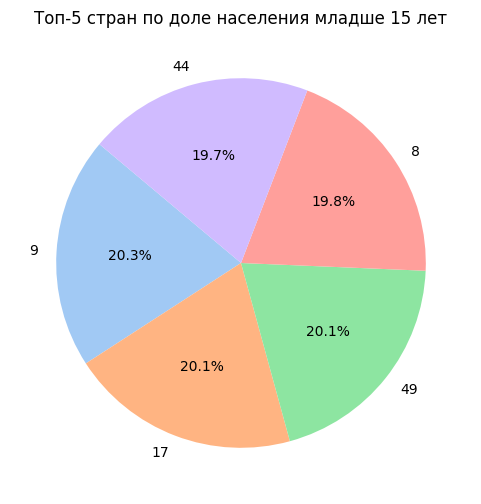

In [8]:
# Для визуализации возьмем топ-5 стран с самой высокой долей pop15
top5_pop15 = df['pop15'].sort_values(ascending=False).head(5)
labels = top5_pop15.index
sizes = top5_pop15.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Топ-5 стран по доле населения младше 15 лет')
plt.show()

2. Гистограмма <br>
Гистограмма позволяет понять, как распределены значения сбережений по странам — есть ли кластеры или смещённость

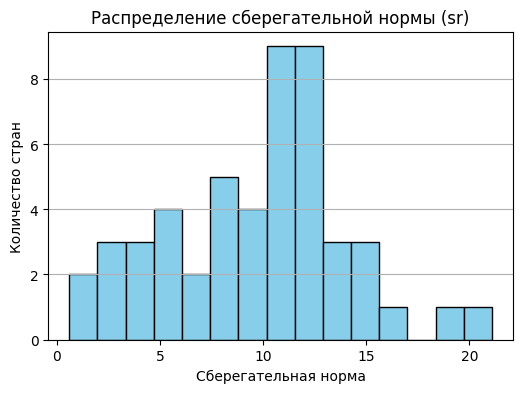

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df['sr'], bins=15, color='skyblue', edgecolor='black')
plt.title('Распределение сберегательной нормы (sr)')
plt.xlabel('Сберегательная норма')
plt.ylabel('Количество стран')
plt.grid(axis='y')
plt.show()

3. Точечная диаграмма (Scatter Plot)<br>
Точечная диаграмма показывает взаимосвязь между двумя переменными — здесь видна тенденция роста сбережений при увеличении дохода.

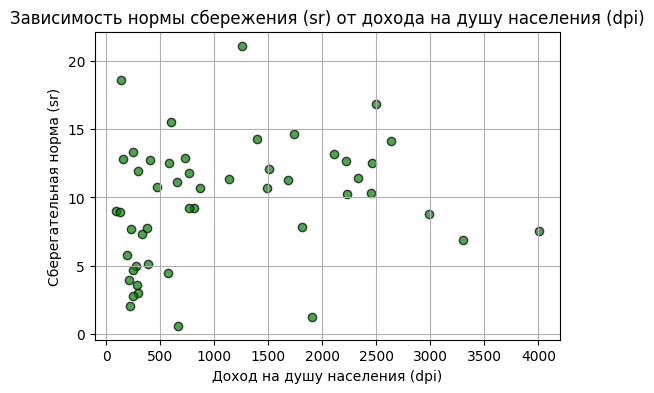

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['dpi'], df['sr'], color='green', edgecolor='black', alpha=0.7)
plt.title('Зависимость нормы сбережения (sr) от дохода на душу населения (dpi)')
plt.xlabel('Доход на душу населения (dpi)')
plt.ylabel('Сберегательная норма (sr)')
plt.grid(True)
plt.show()

4. Диаграмма "ящик с усами" (Boxplot)<br>
Здесь мы хотели показать, как меняется распределение нормы сбережений в зависимости от доли молодежи в населении. Диаграмма «ящик с усами» позволяет увидеть медиану, разброс и выбросы в каждой группе. Мы видим, что сберегательная норма имеет тенденцию к снижению в группах с более высокой долей населения младше 15 лет. Это может указывать на то, что страны с более молодой популяцией сберегают меньше.

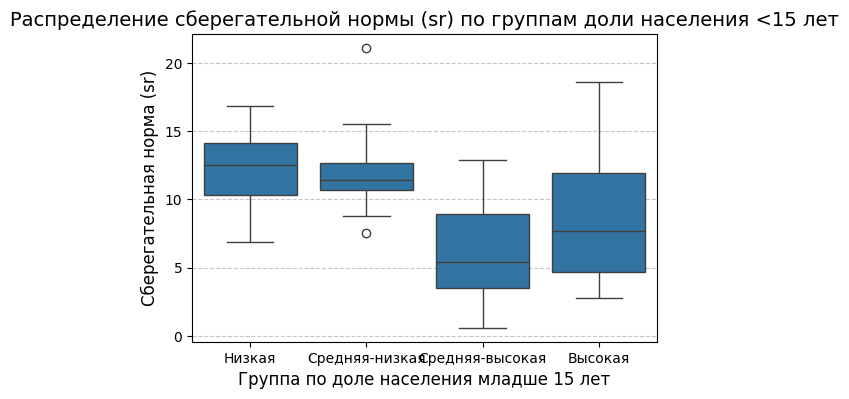

In [19]:
df['pop15_group'] = pd.qcut(df['pop15'], 4, labels=["Низкая", "Средняя-низкая", "Средняя-высокая", "Высокая"])

plt.figure(figsize=(6,4))
sns.boxplot(x='pop15_group', y='sr', data=df)
plt.title('Распределение сберегательной нормы (sr) по группам доли населения <15 лет', fontsize=14)
plt.xlabel('Группа по доле населения младше 15 лет', fontsize=12)
plt.ylabel('Сберегательная норма (sr)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Тепловая карта корреляций<br>
Тепловая карта показывает корреляции между основными переменными набора данных. Ярко видна отрицательная корреляция между сберегательной нормой (sr) и долей населения младше 15 лет (pop15), что подтверждает наблюдение с диаграммы «ящик с усами». Положительная корреляция с доходом на душу населения (dpi) указывает, что более богатые страны склонны иметь более высокую норму сбережений.

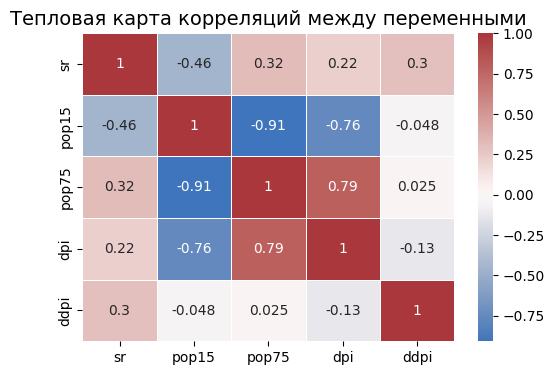

In [18]:
#Данные
plt.figure(figsize=(6,4))
corr = df[['sr', 'pop15', 'pop75', 'dpi', 'ddpi']].corr()
sns.heatmap(corr, annot=True, cmap='vlag', center=0, linewidths=0.5)
plt.title('Тепловая карта корреляций между переменными', fontsize=14)
plt.show()

6. Линейный график — зависимость нормы сбережений от дохода <br>
Используя регрессионный график, мы визуализировали прямую зависимость между доходом на душу населения и нормой сбережений. График подтверждает положительную корреляцию: чем выше доход, тем выше сбережения. Регрессионная линия помогает оценить тренд и силу связи.

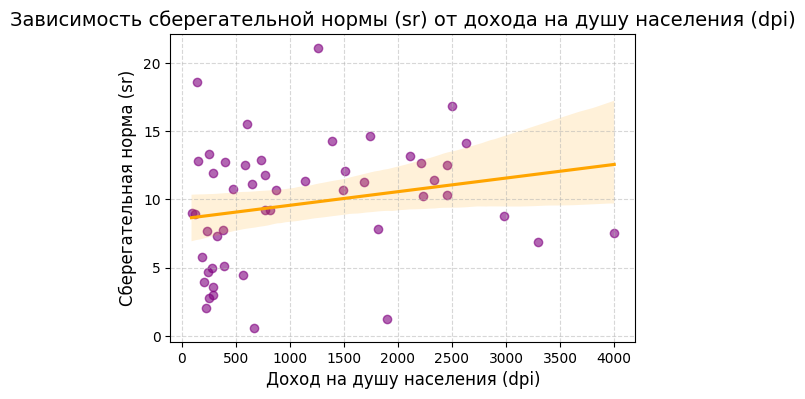

In [20]:
plt.figure(figsize=(6,4))
sns.regplot(x='dpi', y='sr', data=df, scatter_kws={'color':'purple', 'alpha':0.6}, line_kws={'color':'orange'})
plt.title('Зависимость сберегательной нормы (sr) от дохода на душу населения (dpi)', fontsize=14)
plt.xlabel('Доход на душу населения (dpi)', fontsize=12)
plt.ylabel('Сберегательная норма (sr)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

7. Гистограмма с распределением доли населения старше 75 лет  
Гистограмма показывает, что большинство стран имеют относительно низкую долю пожилого населения (>75 лет). Это важно учитывать при анализе сбережений, так как пожилое население может влиять на экономические показатели и сбережения.

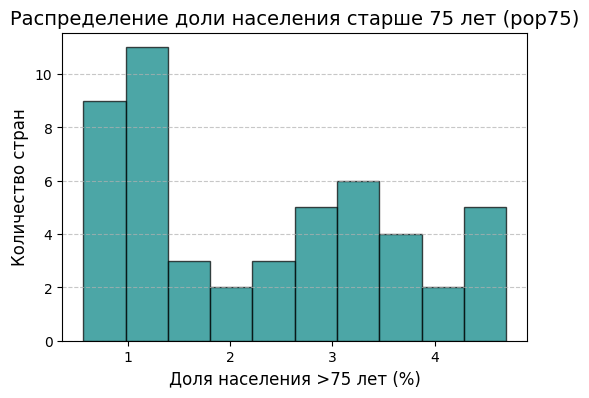

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df['pop75'], bins=10, color='teal', edgecolor='black', alpha=0.7)
plt.title('Распределение доли населения старше 75 лет (pop75)', fontsize=14)
plt.xlabel('Доля населения >75 лет (%)', fontsize=12)
plt.ylabel('Количество стран', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Выводы:
* Сберегательная норма (sr) отрицательно связана с долей населения младше 15 лет (pop15). Это видно и на диаграмме «ящик с усами», и на тепловой карте корреляций. Молодое население, вероятно, связано с большими текущими расходами, что снижает сбережения.
* Положительная корреляция между доходом на душу населения (dpi) и сбережениями (sr) подтверждается регрессионным графиком — более богатые страны склонны сохранять больше.
* Доля пожилого населения (pop75) в большинстве стран невысока, что может влиять на экономическую структуру и сбережения, но корреляция с sr не столь выражена.
* В целом, экономические и демографические факторы тесно взаимосвязаны и влияют на уровень сбережений в разных странах.